**This script is for data visualization**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

with open('nba_stats.csv', 'r') as f:
    data = pd.read_csv(f)

# transform W/L as 1/0 form
data['W/L'] = [1 if i == 'W' else 0 for i in data['W/L']]
print(data.keys())

Index(['TEAM', 'DATE', 'MATCHUP', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', '+/-'],
      dtype='object')


In [3]:
# print out the name of 30 nba teams
print(data['TEAM'].unique())

['UTA' 'SAS' 'SAC' 'POR' 'PHI' 'ORL' 'OKC' 'NYK' 'MIN' 'MIL' 'MIA' 'MEM'
 'LAC' 'IND' 'GSW' 'DET' 'DEN' 'DAL' 'CHI' 'CHA' 'BKN' 'ATL' 'WAS' 'TOR'
 'PHX' 'NOP' 'LAL' 'HOU' 'CLE' 'BOS' 'NOH' 'NJN' 'SEA' 'NOK' 'CHH' 'VAN']


**Each of the name represents:<br>
UTA: Utah Jazz <br>
SAS: San Antonio Spurs <br>
SAC: Sacramento Kings <br>
POR: Portland Trail Blazers <br>
PHI: Philadelphia 76ers <br>
ORL: Orlando Magic <br>
OKC: Oklahoma City Thunder <br>
NYK: Ner York Knicks <br>
MIN: Minnesota Timberwolves <br>
MIL: Milwaukee Bucks <br>
MIA: Miami Heat <br>
MEM: Menphis Grizzlies <br>
LAC: Los Angeles Clippers <br>
IND: Indiana Pacers <br>
GSW: Golden State Warriors <br>
DET: Detroit Pistons <br>
DEN: Denver Nuggets <br>
DAL: Dallas Mavericks <br>
CHI: Chicago Bulls <br>
CHA: Charlotte Hornets <br>
BKN: Brooklyn Nets <br>
ATL: Atlanta Hawks <br>
WAS: Washington Wizards <br>
TOR: Toronto Raptors <br>
PHX: Phoenix Suns <br>
NOP: New Orleans Pelicans <br>
LAL: Los Angeles Lakers <br>
HOU: Houston Rockets <br>
CLE: Cleveland Cavaliers <br>
BOS: Boston Celtics <br>
(Previous teams)<br> 
NOH: New Orleans Hornets (now NOP)<br>
NJN: New Jersey Nets (now BKN) <br>
SEA: Seattle SuperSonics (now OKC)<br>
NOK: Norwgian Krone (not an nba team)<br>
CHH: Charlotte Hornets (now CHA)<br>
VAN: Vancouver Titans (not an nba team)<br>**

For simplicity we just want to do experiments on several teams other than each team. Due to historical reason, W/L banlance and personal emotions, we decide to carry visualization on SAS, CLE, GSW, ORL, BOS, and LAL. 

In [79]:
# Plot the winning rate of each team

# match year tag
class Stats(object):
    def __init__(self, data, period=None):
        self.data = data
        self.stats = {}
        if period == None:
            self.period = range(2000, 2019)
        else:
            self.period = period
        
    def winning_rate(self, team):
        if team in self.stats.keys():
            return self.stats[team]
        
        self.team_data = self.data[self.data['TEAM']==team]
        self.wins = {}
        self.total = {}
        self.win_r = {}
        for i in self.period:
            self.wins[i] = 0
            self.total[i] = 0
            self.win_r[i] = 0.0

        for i, d in self.team_data.iterrows():
            month, day, year = d['DATE'].split('/')
            month = int(month)
            year = int(year)
            
            if month <= 5:
                self.total[year-1] += 1
                if d['W/L'] == 1:
                    self.wins[year-1] += 1
            else:
                self.total[year] += 1
                if d['W/L'] == 1:
                    self.wins[year] += 1
        
        for key in self.wins.keys():
            self.win_r[key] = self.wins[key] / self.total[key] * 100
        
        self.stats[team] = (self.wins, self.total, self.win_r)
        
        return self.wins, self.total, self.win_r
    
    def plot_single(self, team):
        if team not in self.stats.keys():
            raise Exception("Statistics of team {} haven't been calculated yet."
                            .format(team))
        
        _, _, win_r = self.stats[team]
        values = [win_r[key] for key in win_r.keys()]
        plt.plot(self.period, values)

        plt.xticks(np.arange(2000, 2019, 3))
        plt.title('Wining rate of {} during season 2000-2018'.format(team))
        plt.xlabel('Year')
        plt.ylabel('Wining Rate(%)')
        plt.grid()
        plt.show()
    
    def plot_multiple(self, teams):
        for team in teams:
            if team not in self.stats.keys():
                raise Exception("Statistics of team {} haven't been calculated yet."
                                .format(team))
            
            _, _, win_r = self.stats[team]
            values = [win_r[key] for key in win_r.keys()]
            plt.plot(self.period, values)
            
        plt.xticks(np.arange(2000, 2019, 3))
        plt.title('Wining rate curve during season 2000-2018')
        plt.xlabel('Year')
        plt.ylabel('Wining Rate(%)')
        plt.legend(teams)
        plt.grid()
        plt.show()
        
        
stats = Stats(data) 

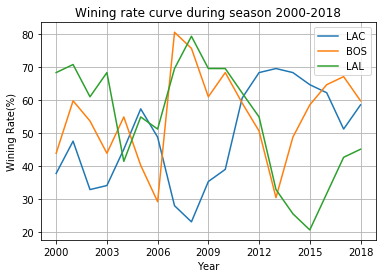

In [85]:
lal_w, lal_t, lal_r = stats.winning_rate('LAC')
#stats.plot_single('LAC')
stats.plot_multiple(['LAC', 'BOS', 'LAL'])